Model training code

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from scipy.stats import zscore

In [13]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
df.shape

(299, 13)

In [124]:
df.duplicated().sum()

np.int64(0)

Checking for NULLs

In [16]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


PCA?

In [18]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Potential models: <br>Logistic regression <br> SVM <br> Decision tree <br> KNN

I will provide the optimal conditions for each model, and then pick the one with the most accurate predictions

In [60]:
x = df.drop(columns="DEATH_EVENT")
y = df["DEATH_EVENT"]

In [117]:
y.value_counts()

,count
DEATH_EVENT,
0,203
1,96


Balancing the dataset

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_res, y_res = smote.fit_resample(x, y)


In [62]:
y_res.value_counts()

,count
DEATH_EVENT,
1,203
0,203


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

Decision Tree model

In [114]:
ADB_DT = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42)
ADB_DT.fit(x_train,y_train)
ADB_DT_pred = ADB_DT.predict(x_test)
print("Decision tree model (with adaBoost) accuracy:", accuracy_score(y_test, ADB_DT_pred))

RF_DT = RandomForestClassifier(max_depth=4, random_state=42)
RF_DT.fit(x_train, y_train)
RF_DT_pred = RF_DT.predict(x_test)
print("Decision tree model (with random forest) accuracy:", accuracy_score(y_test, RF_DT_pred))

Decision tree model (with adaBoost) accuracy: 0.8780487804878049
Decision tree model (with random forest) accuracy: 0.9146341463414634


Logistic Regression model

Pre-processing

Displaying outliers

In [29]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

features = df.columns[:-1]
z_scores = np.abs(zscore(df[features]))

outliers_dict = {}

for i, col in enumerate(features):
    col_data = df[col]
    mean = col_data.mean()
    std = col_data.std()
    LB = mean - 3 * std
    UB = mean + 3 * std
    outlier_mask = z_scores[:, i] > 3
    outliers = col_data[outlier_mask]

    if not outliers.empty:
        outliers_dict[col] = {
            'lower_bound': LB,
            'upper_bound': UB,
            'outliers': list(zip(outliers.index, outliers.values))
        }

for col, data in outliers_dict.items():
    print(f"\nFeature: {col}")
    print(f"  Lower Bound: {data['lower_bound']:.3f}")
    print(f"  Upper Bound: {data['upper_bound']:.3f}")
    print("  Outliers:")
    for idx, val in data['outliers']:
        print(f"    Row {idx}: {val}")
    final_df = df.copy()



Feature: creatinine_phosphokinase
  Lower Bound: -2329.024
  Upper Bound: 3492.703
  Outliers:
    Row 1: 7861
    Row 52: 3964
    Row 60: 7702
    Row 72: 5882
    Row 103: 5209
    Row 134: 4540
    Row 171: 3966

Feature: ejection_fraction
  Lower Bound: 2.579
  Upper Bound: 73.588
  Outliers:
    Row 64: 80

Feature: platelets
  Lower Bound: -30054.681
  Upper Bound: 556770.740
  Outliers:
    Row 105: 621000.0
    Row 109: 850000.0
    Row 296: 742000.0

Feature: serum_creatinine
  Lower Bound: -1.710
  Upper Bound: 4.497
  Outliers:
    Row 9: 9.4
    Row 28: 5.8
    Row 52: 6.8
    Row 131: 6.1
    Row 217: 9.0
    Row 228: 5.0

Feature: serum_sodium
  Lower Bound: 123.388
  Upper Bound: 149.863
  Outliers:
    Row 4: 116
    Row 19: 121
    Row 199: 113


In [30]:
print(df.shape)
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
print(f"# rows with an outlying value: {(z_scores > 3).any(axis=1).sum()}")
final_df = df[(z_scores < 3).all(axis=1)].copy()
print(final_df.shape)

(299, 13)
# rows with an outlying value: 19
(280, 13)


In [35]:
x = df.drop(columns="DEATH_EVENT")
y = df["DEATH_EVENT"]

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_res, y_res = smote.fit_resample(x, y)


In [37]:
y_res.value_counts()

,count
DEATH_EVENT,
1,203
0,203


Applying standard scalar on non-binary features only

In [118]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_res, y_res, test_size=0.2, random_state=42)
bin_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
x_train_SS = x_train2.copy()
x_test_SS = x_test2.copy()
SS = StandardScaler()
for feature in df.columns[:-1]:
  if feature not in bin_cols:
    x_train_SS[[feature]] = SS.fit_transform(x_train[[feature]])
    x_test_SS[[feature]] = SS.fit_transform(x_test[[feature]])
x_train_SS.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,3.240000e+02,324.000000,3.240000e+02,324.000000,3.240000e+02,324.000000,3.240000e+02,3.240000e+02,3.240000e+02,324.000000,324.000000,3.240000e+02
mean,-4.386066e-16,0.379630,1.918904e-17,0.308642,-1.151342e-16,0.311728,1.233581e-16,7.538551e-17,8.936610e-16,0.586420,0.240741,3.563679e-17
std,1.001547e+00,0.486045,1.001547e+00,0.462648,1.001547e+00,0.463916,1.001547e+00,1.001547e+00,1.001547e+00,0.493237,0.428195,1.001547e+00
min,-1.960607e+00,0.000000,-5.613217e-01,0.000000,-1.862715e+00,0.000000,-2.129515e+00,-9.683156e-01,-5.025148e+00,0.000000,0.000000,-1.524839e+00
25%,-7.822520e-01,0.000000,-4.635453e-01,0.000000,-7.809896e-01,0.000000,-5.253190e-01,-5.001821e-01,-4.571979e-01,0.000000,0.000000,-7.675492e-01
50%,-5.394963e-02,0.000000,-3.339346e-01,0.000000,-1.153122e-01,0.000000,-7.129481e-02,-3.316541e-01,-2.215496e-02,1.000000,0.000000,-1.710997e-01
75%,7.586735e-01,1.000000,-3.465392e-03,1.000000,3.007362e-01,1.000000,4.356559e-01,1.552047e-01,6.304094e-01,1.000000,0.000000,9.011691e-01
max,3.024740e+00,1.000000,7.352760e+00,1.000000,3.629123e+00,1.000000,5.971557e+00,6.989954e+00,2.588102e+00,1.000000,1.000000,2.147682e+00


In [58]:
LOGR = LogisticRegression(random_state=42)
LOGR.fit(x_train_SS, y_train2)
LOGR_pred = LOGR.predict(x_test_SS)
print(f'Logistic regression model accuracy: {accuracy_score(y_test2, LOGR_pred)}')

Logistic regression model accuracy: 0.8658536585365854


KNN model

In [119]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train_SS, y_train2)
KNN_pred = KNN.predict(x_test_SS)
print(f'KNN model accuracy: {accuracy_score(y_test2, KNN_pred)}')

KNN model accuracy: 0.8536585365853658


SVM model

In [120]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_MM = MinMaxScaler().fit_transform(x_train3)
x_test_MM = MinMaxScaler().fit_transform(x_test3)

In [121]:
BG_SVC = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
BG_SVC.fit(x_train_MM, y_train3)
BG_SVC_pred = BG_SVC.predict(x_test_MM)
print(f'SVC accuracy (with bagging): {accuracy_score(y_test3, BG_SVC_pred)}')

SVC accuracy (with bagging): 0.7333333333333333


Random Forest (DT) wins (for now)

In [123]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(RF_DT, f)

3 random test samples

In [ ]:
indices = [5, 14, 55]
samples = x_test.iloc[indices]
sample_labels = y_test.iloc[indices]

for i, (sample, label) in enumerate(zip(samples.iterrows(), sample_labels)):
    print(f"Sample {i+1}:")
    print(sample[1])
    print("Label:", label)
    print()

Sample 1:
age                             45.0
anaemia                          1.0
creatinine_phosphokinase       981.0
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   136000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                            11.0
Name: 12, dtype: float64
Label: 1

Sample 2:
age                             60.0
anaemia                          0.0
creatinine_phosphokinase       582.0
diabetes                         1.0
ejection_fraction               38.0
high_blood_pressure              1.0
platelets                   451000.0
serum_creatinine                 0.6
serum_sodium                   138.0
sex                              1.0
smoking                          1.0
time                            40.0
Name: 47, dtype: float64
Label: 1

Sample 3:
age         

Classification report

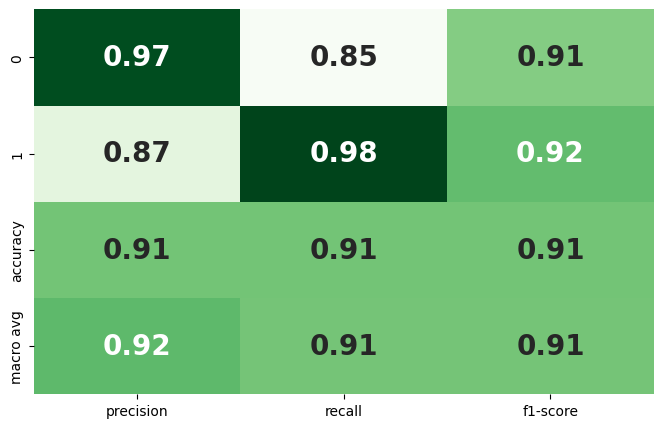

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, RF_DT_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True,
            cmap="Greens",
            cbar=False,
            annot_kws={"size": 20, "weight": "bold"})

plt.show()
